In [32]:
import networkx as nx
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import geopandas as gpd
import json
from shapely.geometry import Point, LineString 
from scipy.spatial import distance

In [2]:
# create graph London's underground
filename = 'london_tubenetwork.graphml'
G = nx.read_graphml(filename)

In [3]:
# London's underground information
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 438
Number of edges: 486
Average degree:   2.2192


In [4]:
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [5]:
nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [6]:
# select 3 centrality measures
# degree betwenness closeness
# give the results for the first 10 ranked nodes for each of the 3 measures.
degs = dict(nx.degree(G))
bc = dict(nx.betweenness_centrality(G))
cc = dict(nx.closeness_centrality(G))

degs_sort = sorted(degs.items(), key=lambda x:-x[-1])
bc_sort = sorted(bc.items(), key=lambda x:-x[-1])
cc_sort = sorted(cc.items(), key=lambda x:-x[-1])

In [7]:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [8]:
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)

# save node degree informations
df_sorted.to_csv('Degree Centrality.csv')

df_sorted[0:10]

,station_name,degree
940GZZLUKSX,King's Cross St. Pancras,0.016018
940GZZLUBST,Baker Street,0.016018
940GZZLUOXC,Oxford Circus,0.013730
940GZZLUGPK,Green Park,0.013730
940GZZLUBNK,Bank,0.013730
940GZZLUECT,Earl's Court,0.013730
940GZZLUWLO,Waterloo,0.013730
940GZZLUTNG,Turnham Green,0.011442
940GZZDLCGT,Canning Town (DLR),0.011442
940GZZLULVT,Liverpool Street,0.011442


In [9]:
pos = nx.get_node_attributes(G, 'coords')

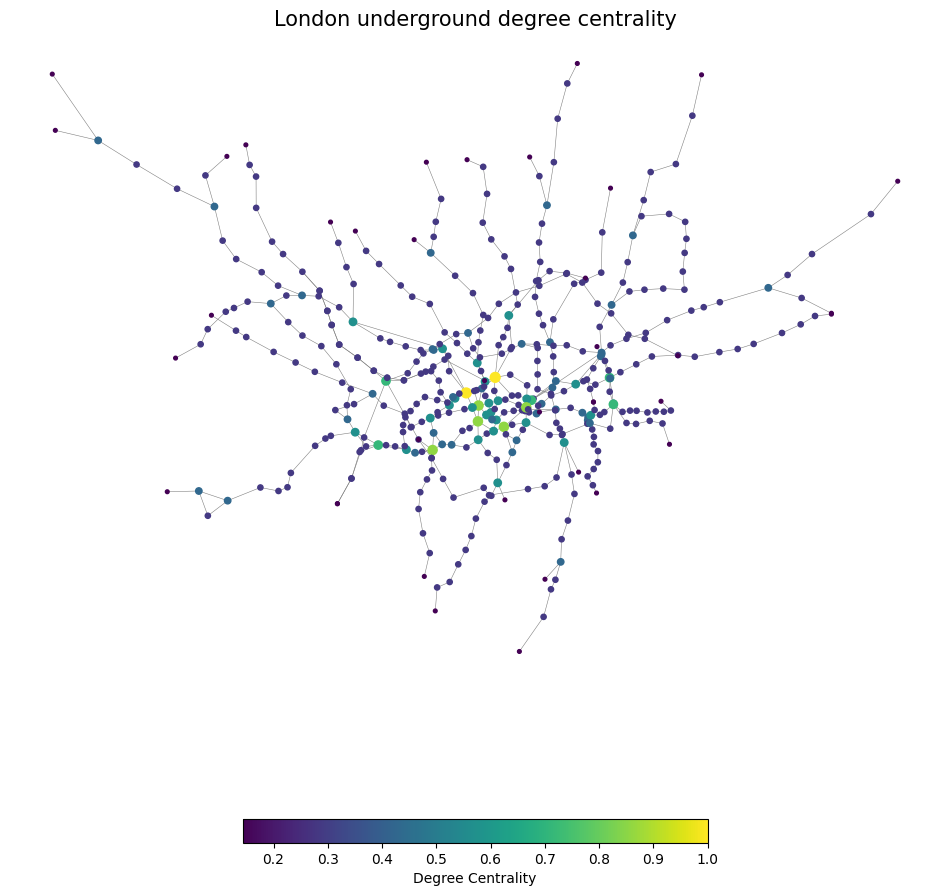

In [10]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground degree centrality",fontsize=15)
plt.show()

In [11]:
# betweenness centrality:
bet_london = nx.betweenness_centrality(G,normalized=False)
nx.set_node_attributes(G,bet_london,'betweenness')

In [12]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness'] = pd.Series(nx.get_node_attributes(G, 'betweenness'))

df_sorted = df.sort_values(["betweenness"], ascending=False)
df_sorted[0:10]

# save node betweenness informations
df_sorted.to_csv('Betweenness Centrality.csv')

df_sorted[0:10]

,station_name,betweenness
940GZZLUBST,Baker Street,36297.775794
940GZZLUBLG,Bethnal Green,33670.108333
940GZZLUFYR,Finchley Road,32064.800397
940GZZLUBNK,Bank,30443.441667
940GZZLUGPK,Green Park,30442.438095
940GZZLUWLO,Waterloo,30219.900000
940GZZLULVT,Liverpool Street,29820.741667
940GZZLUWSM,Westminster,27623.541667
940GZZLUBND,Bond Street,24635.653175
910GWHMDSTD,West Hampstead,22536.658333


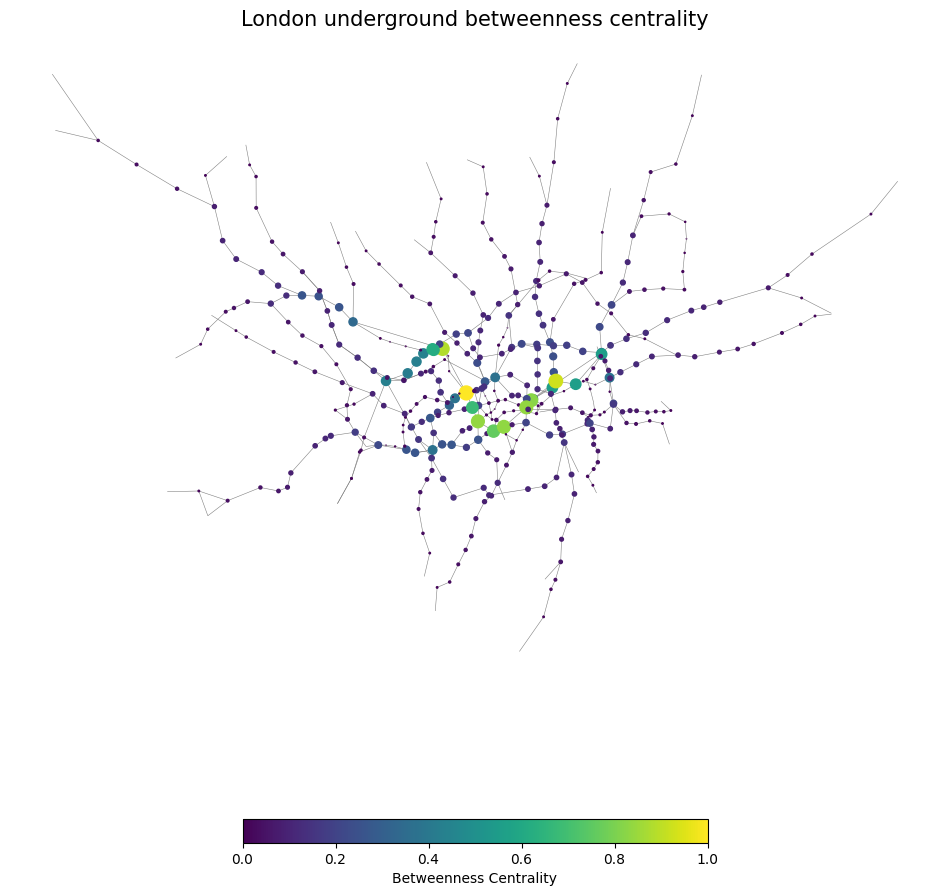

In [13]:
# Lets set colour and size of nodes according to betweenness values
betweenness_values=[(i[1]['betweenness']) for i in G.nodes(data=True)]

bet_color=[(i[1]['betweenness']/max(betweenness_values)) for i in G.nodes(data=True)]
bet_size=[(i[1]['betweenness']/max(betweenness_values))*100 for i in G.nodes(data=True)]

# Plot graph
pos=pos

fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_color,
        node_size= bet_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground betweenness centrality",fontsize=15)
plt.show()

In [14]:
# closeness centrality: 
clos = nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos,'closeness')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness'] = pd.Series(nx.get_node_attributes(G, 'closeness'))

df_sorted = df.sort_values(["closeness"], ascending=False)
df_sorted[0:10]

# save node closeness informations
df_sorted.to_csv('Closeness Centrality.csv')

df_sorted[0:10]

,station_name,closeness
940GZZLUGPK,Green Park,0.094897
940GZZLUBND,Bond Street,0.093737
940GZZLUWSM,Westminster,0.093197
940GZZLUBST,Baker Street,0.092900
940GZZLUWLO,Waterloo,0.092389
940GZZLUBNK,Bank,0.092000
940GZZLUOXC,Oxford Circus,0.091614
940GZZLULVT,Liverpool Street,0.090010
940GZZLURGP,Regent's Park,0.089275
940GZZLUFYR,Finchley Road,0.089165


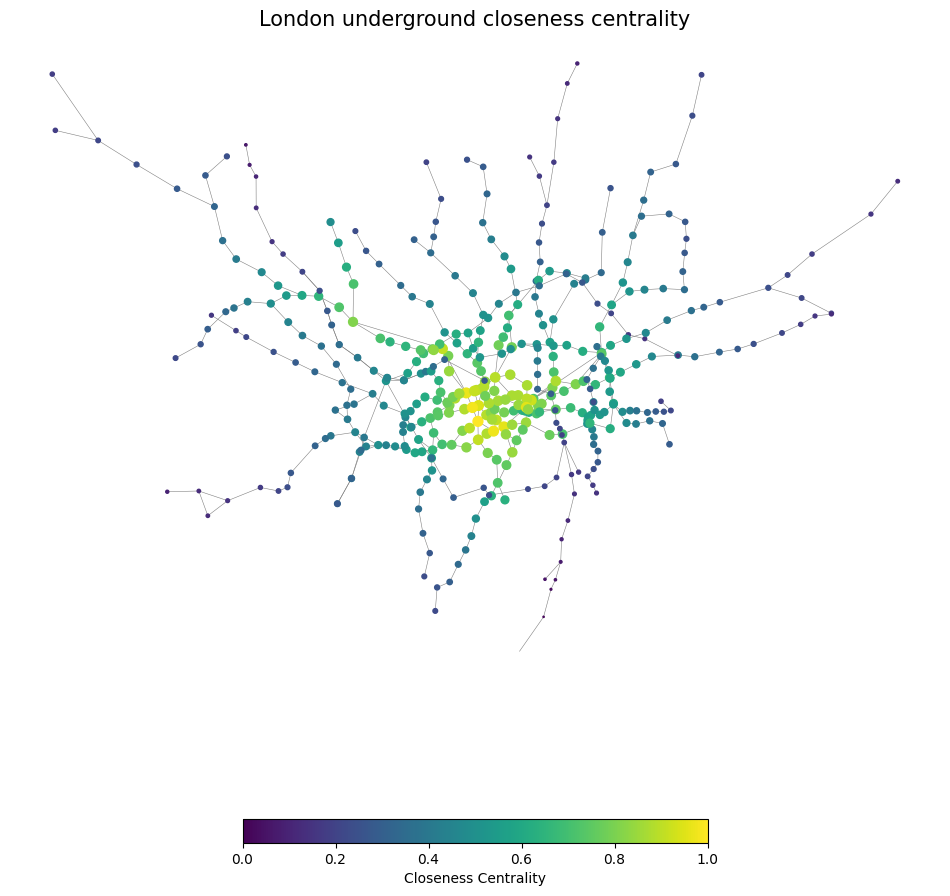

In [15]:
# Lets set color and width of nodes according to the closeness values

clos_val=[(i[1]['closeness']) for i in G.nodes(data=True)]

closs_color=[(i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val)) for i in G.nodes(data=True)]
closs_size=[((i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_color,
        node_size= closs_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground closeness centrality",fontsize=15)
plt.show()

In [16]:
# find 2 different measures to evaluate the impact of the node remove on the network.
# network efficiency
# the largest connected component
def cal_network_efficiency(G,N):

    e = 0
    nodes = list(G.nodes())

    if len(nodes) < 2:
        return 0

    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if i != j:
                try:
                    d = nx.shortest_path_length(G, nodes[i], nodes[j])
                    e += 1/d
                except:
                    d = 0
                    e += 0

    E = e / (N*(N-1))

    return E

def cal_largest_connected_component(G,N):

    nums = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

    if len(nums):
        return nums[0] / N
    else:
        return 0


In [17]:
# node removal
# remove 10 nodes
def att_node(G1,nodes_sort):
    '''
    node removal non-sequential
    '''

    G = G1.copy()

    res_con = []
    res_eff = []
    N = len(G.nodes())
    e0 = cal_network_efficiency(G,N)
    res_eff.append(e0)
    n0 = cal_largest_connected_component(G, N)
    res_con.append(n0) 

    for node in nodes_sort:

        G.remove_node(node)

        e = cal_network_efficiency(G,N)
        res_eff.append(e)

        n = cal_largest_connected_component(G, N)
        res_con.append(n) 

    return res_con,res_eff

def show_node_attack(data1, data2, data3, ylabel, filename):
    '''
    显示
    '''
    x1 = [i for i in range(len(data1))]
    x2 = [i for i in range(len(data2))]
    x3 = [i for i in range(len(data3))]


    plt.figure(figsize=(14,9))

    plt.plot(x1,data1,label='Degree Centrality', marker='^')
    plt.plot(x2,data2,label='Betweenness Centrality', marker='<')
    plt.plot(x3,data3,label='Closeness Centrality', marker='>')
    

    plt.tick_params(labelsize=30)
    plt.legend(fontsize=25)
    plt.xlabel('num',fontsize=28)
    plt.ylabel(ylabel,fontsize=28)
    plt.savefig(filename)


def att_node_sequential(G1,KKK,att_name):

    G = G1.copy()

    record_nodes = []

    res_con = []
    res_eff = []
    N = len(G.nodes())
    e0 = cal_network_efficiency(G,N)
    res_eff.append(e0)
    n0 = cal_largest_connected_component(G, N)
    res_con.append(n0) 

    for i in range(KKK):

        if att_name == 'DC':
            dicts = dict(nx.degree(G))
            nodes_sort = [k for k,v in sorted(dicts.items(), key=lambda x:-x[-1])]
        elif att_name == 'CC':
            dicts = dict(nx.closeness_centrality(G))
            nodes_sort = [k for k,v in sorted(dicts.items(), key=lambda x:-x[-1])]
        elif att_name == 'BC':
            dicts = dict(nx.betweenness_centrality(G))
            nodes_sort = [k for k,v in sorted(dicts.items(), key=lambda x:-x[-1])]
        else:
            raise NameError('输入有误')

        node = nodes_sort[0]

        G.remove_node(node)
        record_nodes.append(node)

        e = cal_network_efficiency(G,N)
        res_eff.append(e)

        n = cal_largest_connected_component(G, N)
        res_con.append(n)  




    return res_con,res_eff, record_nodes

In [18]:
def get_nodes_centrality(filename):
    '''
    get London's underground station centrality
    '''
    datas = pd.read_csv(filename, header=0, index_col=None)
    datas = np.array(datas)
    datas = datas.tolist()

    dicts = {}
    for data in datas:
        dicts[data[0]] = data[2]

    return dicts

In [19]:
dc = get_nodes_centrality("Degree Centrality.csv")
bc = get_nodes_centrality("Betweenness Centrality.csv")
cc = get_nodes_centrality("Closeness Centrality.csv")

In [21]:
dc_sort = sorted(dc.items(), key=lambda x:-x[-1])
bc_sort = sorted(bc.items(), key=lambda x:-x[-1])
cc_sort = sorted(cc.items(), key=lambda x:-x[-1])

In [22]:
dc_sort_node = [k for k,v in dc_sort]
bc_sort_node = [k for k,v in bc_sort]
cc_sort_node = [k for k,v in cc_sort]

num_of_remove_nodes = 20

dc_con, dc_eff = att_node(G, dc_sort_node[:num_of_remove_nodes])
cc_con, cc_eff = att_node(G, cc_sort_node[:num_of_remove_nodes])
bc_con, bc_eff = att_node(G, bc_sort_node[:num_of_remove_nodes])

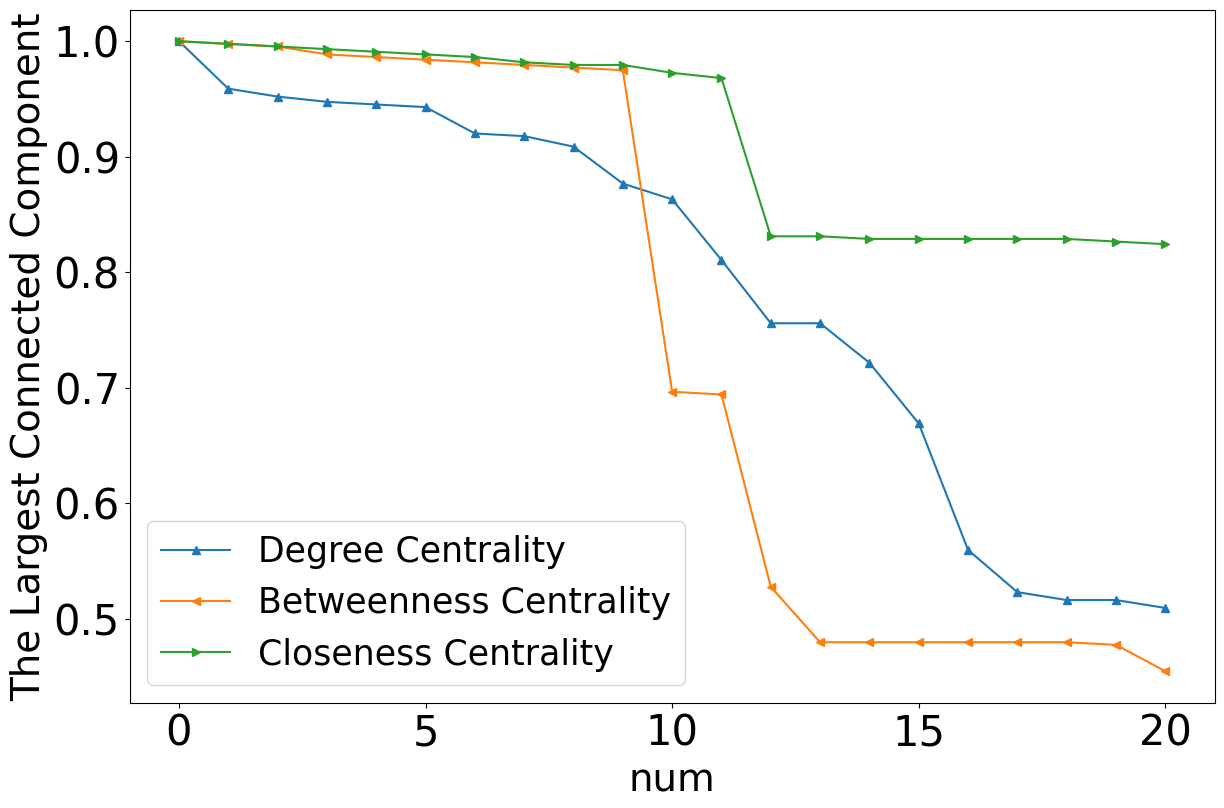

In [96]:
show_node_attack(dc_con, bc_con, cc_con, 'The Largest Connected Component', '001-The largest connected component.png')

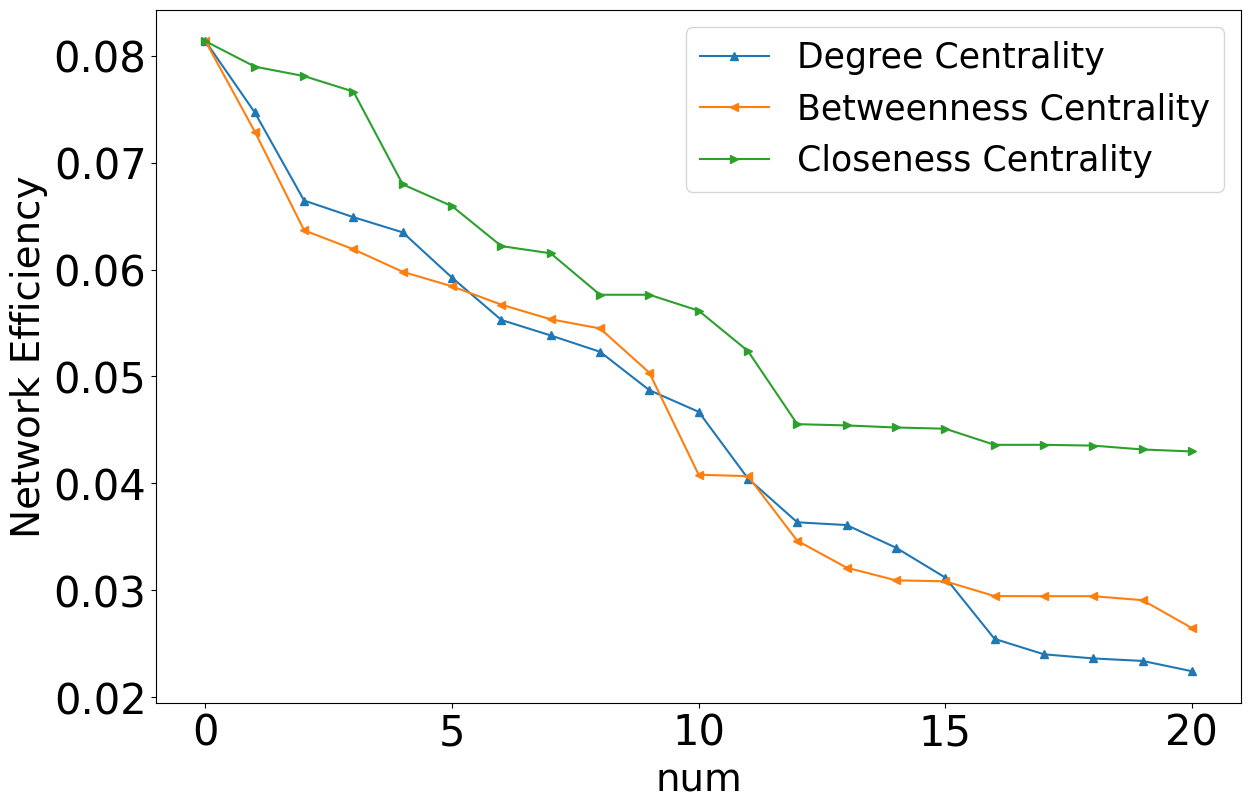

In [97]:
show_node_attack(dc_eff, bc_eff, cc_eff, 'Network Efficiency', '001-network efficiency.png')

In [ ]:
se_dc_con, se_dc_eff, se_dc_nodes = att_node_sequential(G, num_of_remove_nodes,'DC')

se_cc_con, se_cc_eff,se_cc_nodes = att_node_sequential(G, num_of_remove_nodes,'CC')

se_bc_con, se_bc_eff,se_bc_nodes = att_node_sequential(G, num_of_remove_nodes, "BC")

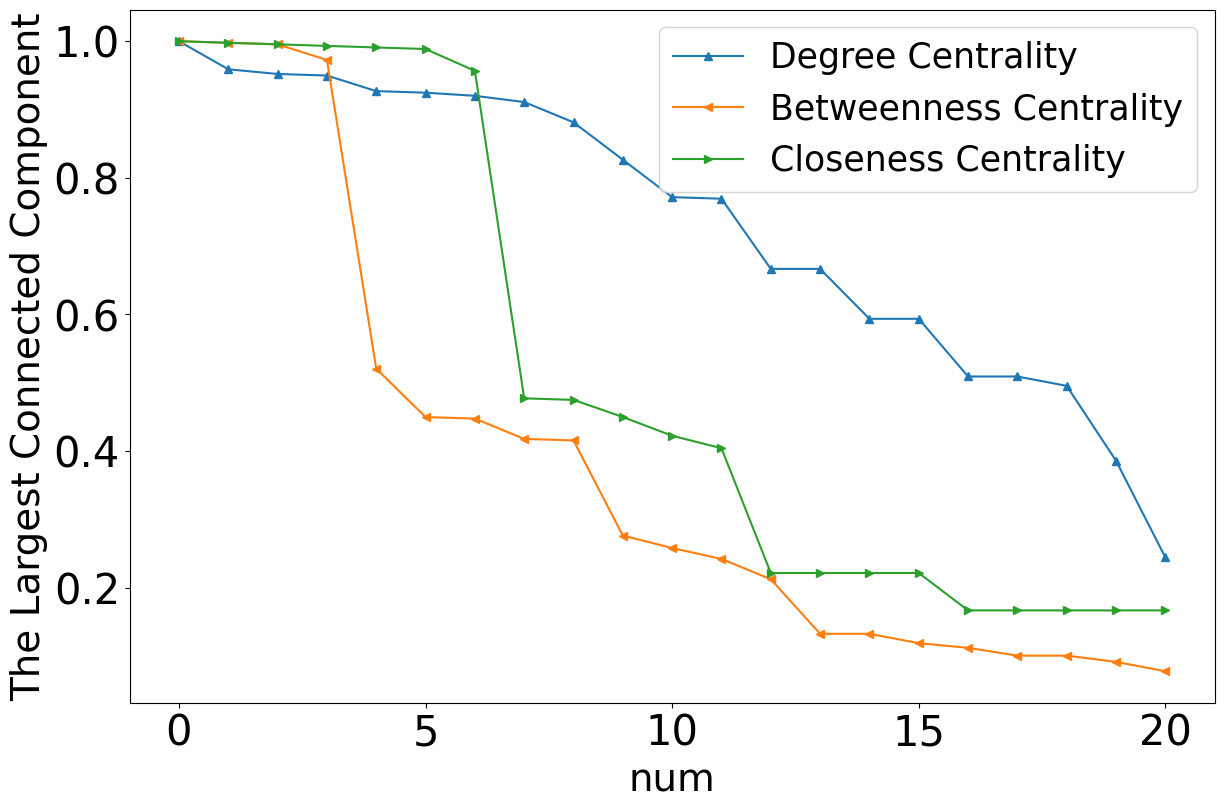

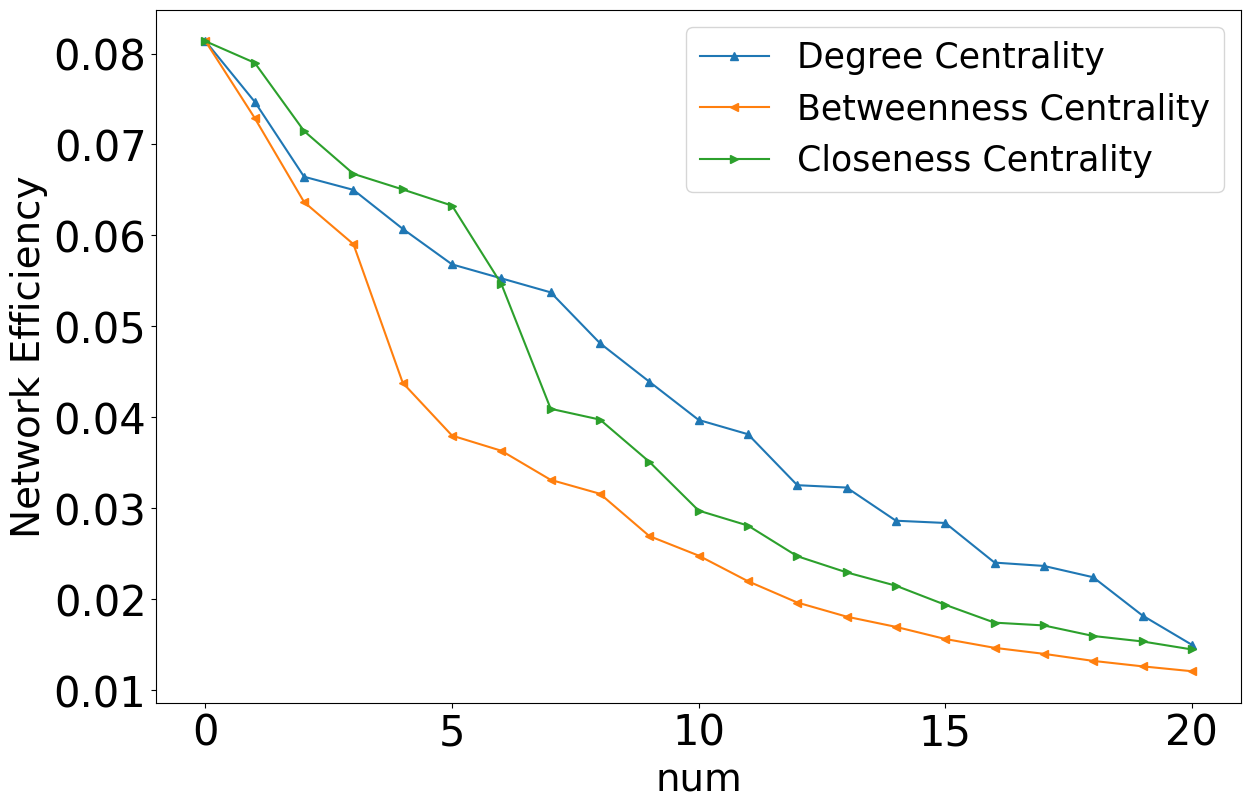

In [99]:
show_node_attack(se_dc_con, se_bc_con, se_cc_con, 'The Largest Connected Component', '002-The largest connected component.png')
show_node_attack(se_dc_eff, se_bc_eff, se_cc_eff, 'Network Efficiency', '002-network efficiency.png')

In [5]:
# 1.2
files = ['NBT19MTT2b_od__DLR_tb_wf.csv', 
         'NBT19MTT2b_od__EZL_tb_wf.csv', 
         'NBT19MTT2b_od__LO_tb_wf.csv', 
         'NBT19MTT2b_od__LU_tb_wf.csv']

dfs = []

for file in files:
    dfs.append(pd.read_csv(file))
    
london_OD = pd.concat(dfs, ignore_index=True)

definition_df = pd.read_excel('NBT19_Definitions.xlsx', 'Stations')

#add the station names
london_OD['station_origin'] = london_OD['mode_mnlc_o'].apply(lambda x: definition_df[definition_df.MNLC==x]['StationName'].values[0])
london_OD['station_destination'] = london_OD['mode_mnlc_d'].apply(lambda x: definition_df[definition_df.MNLC==x]['StationName'].values[0])

In [6]:
london_OD_AMpeak = london_OD[['station_origin', 'station_destination', '3']].copy()
london_OD_AMpeak.rename({'3':'flows'}, axis=1, inplace=True)
london_OD_AMpeak.flows = london_OD_AMpeak.flows.astype(int)


In [7]:
station_origin = list(london_OD_AMpeak.station_origin.values)
station_destination = list(london_OD_AMpeak.station_destination.values)
all_stations = list(set(station_origin + station_destination))
all_stations = sorted(all_stations, key=str.lower)

In [10]:
london_OD_AMpeak['station_origin']= london_OD_AMpeak.station_origin.apply(lambda x: 
                                      re.sub('\sLU\s?|\sLO\s?|\sNR\s?|\sTf[lL]\s?|\sDLR\s?|\s\(.*\)', '', x)
                                     )
london_OD_AMpeak['station_destination']=london_OD_AMpeak.station_destination.apply(lambda x: 
                                      re.sub('\sLU\s?|\sLO\s?|\sNR\s?|\sTf[lL]\s?|\sDLR\s?|\s\(.*\)', '', x)
                                     )

In [11]:
london_OD_AMpeak = london_OD_AMpeak.groupby(['station_origin', 'station_destination']).sum().reset_index()

In [13]:
outflows = london_OD_AMpeak.groupby('station_origin').sum()
inflows = london_OD_AMpeak.groupby('station_destination').sum()

In [16]:
stations = gpd.read_file('tfl_stations.json')
lines = gpd.read_file('tfl_lines.json')

In [17]:
stations = stations.to_crs(epsg = 27700)
lines = lines.to_crs(epsg = 27700)

In [19]:
#get all station names
station_names = {row.id: row['name'] for i, row in stations.iterrows()}

In [24]:
line_names  = lines.lines.apply(lambda x: [x['name'] for x in json.loads(x)] )
line_names = list(set([item for sublist in line_names for item in sublist]))

In [21]:
#get position of stations as mean of x, y of stations

#create empty dict to store list of coordinates
pos = {}

#iterate through the stations
for i, station in stations.iterrows():
    xy = station.geometry.coords[0]
    
    #if station already in dict add coordinate to coordinate list
    if station['name'] in pos.keys():
        pos[station['name']].extend([xy])
    #if station is not in the dict add station to dict and set first coordinate in list
    else:
        pos[station['name']] = [xy]

#iterate through our dict and replace coordinate list with mean value
for k, v in pos.items():
    #we set axis to 0 to make sure to take mean of x and y coordinates
    pos[k] = np.mean(v, axis=0)

In [25]:
#Our TFL data doesn't include tramlink, emirates air lines, and crossrail is still in construction
#exclude the lines that we are not going to use
excluded_lines = ['Thameslink 6tph line', 'East London', 'Crossrail 2', 'Emirates Air Line', 'Crossrail', 'Tramlink']

In [29]:
#create an empty dict to hold our geometric graphs
geometric_graphs = {}

#iterate through each line individually
for line_name in line_names:
    #skip lines that we won't be using
    if line_name in excluded_lines :
        continue
    
    #subset our line and station files for the ones the belong to a specific line
    temp_lines = lines[lines.lines.str.contains(line_name)]
    temp_stations = stations[stations.lines.str.contains(line_name)]
    
    #create empty graph
    G= nx.Graph()
    
    #iterate through our line geometries
    for i, line in temp_lines.iterrows():
        #get list of coordinates that define our line
        _l = list(line.geometry.coords)

        #add coordinates as edges
        G.add_edges_from(list(zip(_l,_l[1:])))
    
    #remove any self loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    #the position of the node is the name of the node
    #let's extract this to plot our graph
    pos = {n: n for n in G.nodes()}
    
    # get degree one nodes
    D = nx.degree(G)
    k1 = [node for node,degree in D if degree==1]
    
    #get distance between all points of 1-degree, this will be a matrix
    dist = distance.cdist(k1, k1)
    
    #add edges between points that are close
    for j in range(dist.shape[0]-1):
        temp = dist[j][j+1:]
        #get index of closest node
        i_min = np.argmin(temp)
        if dist[j][i_min+j+1]<50:
            G.add_edge(k1[j],k1[i_min+j+1])
    
    #recalculate degree
    D = nx.degree(G)
    k1 = [node for node,degree in D if degree==1]

    #store graph in dictionary
    geometric_graphs[line_name] = G


In [30]:
#clean station names
for k, v in station_names.items():
    if k == 'none':
        continue
    cleaned_name = re.sub('\sLU\s?|\sLO\s?|\sNR\s?|\sTf[lL]\s?|\sDLR\s?|\s\(.*\)', '', v)
    
    #note that bank and monument are enconded as one station in our TFL data, so we will do the same
    if cleaned_name in ['Bank', 'Monument']:
        cleaned_name = 'Bank and Monument'
    station_names[k] = cleaned_name
    
stations['name'] = stations['id'].apply(lambda x: station_names[x])

In [35]:
line_names  = lines.lines.apply(lambda x: [x['name'] for x in json.loads(x)] )
line_names = list(set([item for sublist in line_names for item in sublist]))

In [36]:
lines.lines = lines.lines.str.replace('East London', 'London Overground')
stations.lines = stations.lines.str.replace('East London', 'London Overground')

In [40]:
edge_list = []
def _has_ids(k):
    #helper function to check if line contains id of start and end station
    if ('start_sid' in k.keys()) and ('end_sid' in k.keys()):
        return True
    else:
        return False

#iterate through each line seperately 
for line_name in line_names:
    if line_name in excluded_lines :
        continue
        
    #subset lines and stations
    temp_lines = lines[lines.lines.str.contains(line_name)]
    temp_stations = stations[stations.lines.str.contains(line_name)]
    
    #for each line in our subset dataframe get each origin and destination pair
    for i, line in temp_lines.iterrows():
        for k in json.loads(line.lines):
            if k['name'] == line_name:
                if _has_ids(k):
                    #get start and end station ids
                    start_id = k['start_sid']
                    end_id = k['end_sid']

                    #get info of start and end station
                    start_station = temp_stations[(temp_stations.id == start_id) | (temp_stations.altmodeid == start_id)].values
                    end_station = temp_stations[(temp_stations.id == end_id) | (temp_stations.altmodeid == end_id)].values
                    
                    #if no matching station exist, let's just take the starting and ending coordinate of the line for now
                    if len(start_station) >= 1 and len(end_station) >=1:
                        s_geom = start_station[0][-1].coords[0]
                        e_geom = end_station[0][-1].coords[0]
                        edge_list.append({
                            'line_name': line_name,
                            'start_id': start_id,
                            'end_id': end_id,
                            'geometry': LineString([s_geom, e_geom])
                        })

In [41]:
edge_gdf = gpd.GeoDataFrame(edge_list)

In [43]:
edge_gdf['length'] = edge_gdf.geometry.length

In [52]:
station_names_2 = {row.altmodeid: row['name'] for i, row in stations.iterrows() if row.altmodeid != None}
station_names.update(station_names_2)

In [53]:
edge_gdf['start_id'] = edge_gdf['start_id'].apply(lambda x: station_names[x])
edge_gdf['end_id'] = edge_gdf['end_id'].apply(lambda x: station_names[x])

In [55]:
#now we can use this to create our network!
G = nx.from_pandas_edgelist(edge_gdf, source = 'start_id', target='end_id', edge_attr=['length', 'line_name'])

{'Metropolitan', 'London Overground', 'Central', 'Bakerloo', 'District', 'Circle', 'Victoria', 'Piccadilly', 'Northern', 'DLR', 'Jubilee', 'TfL Rail', 'Waterloo & City', 'Hammersmith & City'}


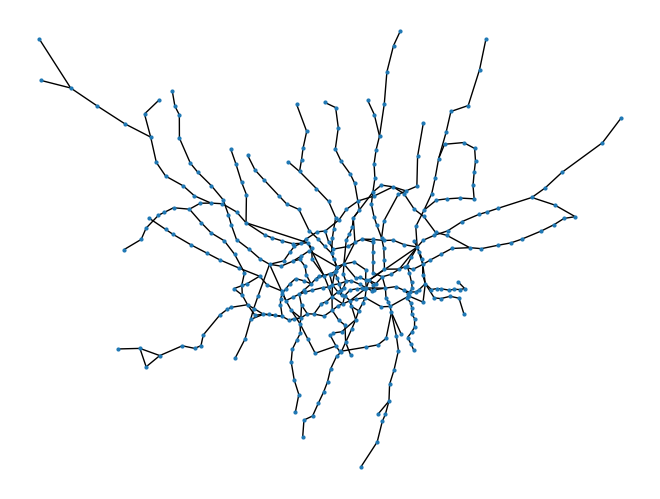

In [56]:
pos = {row['name']: row.geometry.coords[0] for i, row in stations.iterrows() if row['name'] in G.nodes()}
Gcc = nx.connected_components(G)
for n in Gcc:
    G_sub = G.subgraph(n)
    lines = [data['line_name'] for u,v, data in G_sub.edges(data=True)]
    print(set(lines))
    nx.draw(G_sub, pos, node_size=4)
    plt.show()

In [57]:
nx.set_node_attributes(G, pos, 'coords')

In [63]:
OD_names = set(london_OD_AMpeak.station_origin.unique())
network_names = set([n for n in G.nodes()])

In [64]:
name_map = {
    'Heathrow Terminal 4 EL': 'Heathrow Terminal 4',
    'Heathrow Terminals 123': 'Heathrow Terminals 2 & 3',
    'Heathrow Terminals 2 & 3 EL': 'Heathrow Terminals 2 & 3',
    "Walthamstow Queen's Road": 'Walthamstow Queens Road'
}

In [65]:
london_OD_AMpeak.station_origin = london_OD_AMpeak.station_origin.apply(
    lambda x: name_map[x] if x in name_map.keys() else x
)
london_OD_AMpeak.station_destination = london_OD_AMpeak.station_destination.apply(
    lambda x: name_map[x] if x in name_map.keys() else x
)

In [66]:
OD_names = set(london_OD_AMpeak.station_origin.unique())
_filter = list(network_names.symmetric_difference(OD_names))

In [67]:
london_OD_AMpeak = london_OD_AMpeak[~london_OD_AMpeak.station_origin.isin(_filter)]
london_OD_AMpeak = london_OD_AMpeak[~london_OD_AMpeak.station_destination.isin(_filter)]

In [68]:
#create a dictionary to store flows for all edges
flows = {(u,v): 0 for u,v in G.edges()}

In [69]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 401
Number of edges: 467
Average degree:   2.3292


In [70]:
#calculate shortest paths for all flows and add data to dict
for i, row in london_OD_AMpeak.iterrows():
    source = row.station_origin
    target = row.station_destination
    
    #get shortest path
    path = nx.dijkstra_path(G, source, target)
    
    #our path is a list of nodes, we need to turn this to a list of edges
    path_edges = list(zip(path,path[1:])) 
    
    #add flows to our dict
    for u,v in path_edges:
        try:
            flows[(u,v)] += row.flows
        except:
            flows[(v,u)] += row.flows

In [71]:
nx.set_edge_attributes(G, flows, 'flows')

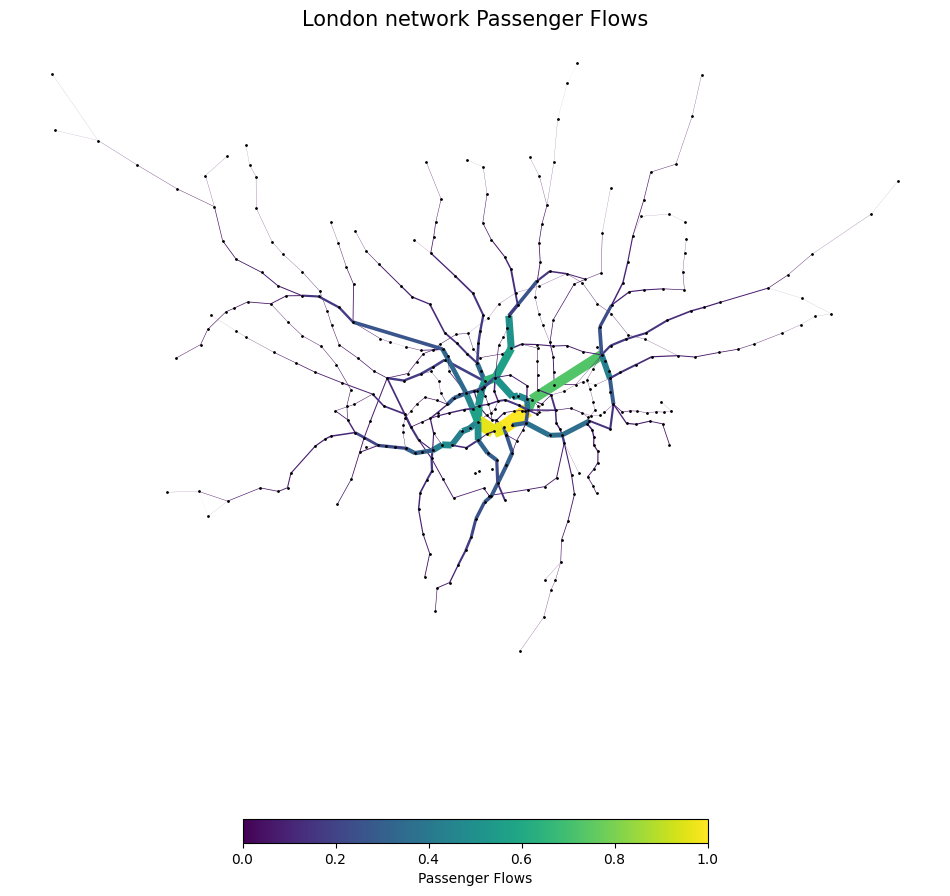

In [72]:
#plot our calcuated flows
flows_values = flows.values()
flow_color=[(i[2]['flows']/max(flows_values)) for i in G.edges(data=True)]
flow_width=[(i[2]['flows']/max(flows_values)*10) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

#pos=nx.spring_layout(X)
edg=nx.draw_networkx_edges(G, pos,edge_color=flow_color, width=flow_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Passenger Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London network Passenger Flows",fontsize=15)
plt.show()

In [73]:
# 1.2 
# weight
G1 = G.copy()

In [96]:
# 1.2.1
dc_g1 = dict(nx.degree(G1,weight='flows'))
bc_g1 = dict(nx.betweenness_centrality(G1,weight='flows'))
pr_g1 = dict(nx.pagerank(G1,weight='flows'))
cc_g1 = dict(nx.closeness_centrality(G1, distance='flows'))

dc_sort_g1 = sorted(dc_g1.items(), key=lambda x:-x[-1])
bc_sort_g1 = sorted(bc_g1.items(), key=lambda x:-x[-1])
pr_sort_g1 = sorted(pr_g1.items(), key=lambda x:-x[-1])
cc_sort_g1 = sorted(cc_g1.items(), key=lambda x:-x[-1])

# save node informations
result = []
for k,v in dc_g1.items():
    result.append([k, v, bc_g1[k], pr_g1[k], cc_g1[k]])

with open('node information weight.csv', 'w+', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['node','degree centrality','betweenness centrality','PageRank centrality', 'Closeness Centrality'])
    writer.writerows(result)

In [97]:
# unweight
dc_g2 = dict(nx.degree_centrality(G1))
bc_g2 = dict(nx.betweenness_centrality(G1))
pr_g2 = dict(nx.pagerank(G1,weight='None'))
cc_g2 = dict(nx.closeness_centrality(G1))

dc_sort_g2 = sorted(dc_g2.items(), key=lambda x:-x[-1])
bc_sort_g2 = sorted(bc_g2.items(), key=lambda x:-x[-1])
pr_sort_g2 = sorted(pr_g2.items(), key=lambda x:-x[-1])
cc_sort_g2 = sorted(cc_g2.items(), key=lambda x:-x[-1])

# save node informations
result = []
for k,v in dc_g2.items():
    result.append([k, v, bc_g2[k], pr_g2[k], cc_g2[k]])

with open('node information.csv', 'w+', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['node','degree centrality','betweenness centrality','PageRank centrality', 'Closeness Centrality'])
    writer.writerows(result)

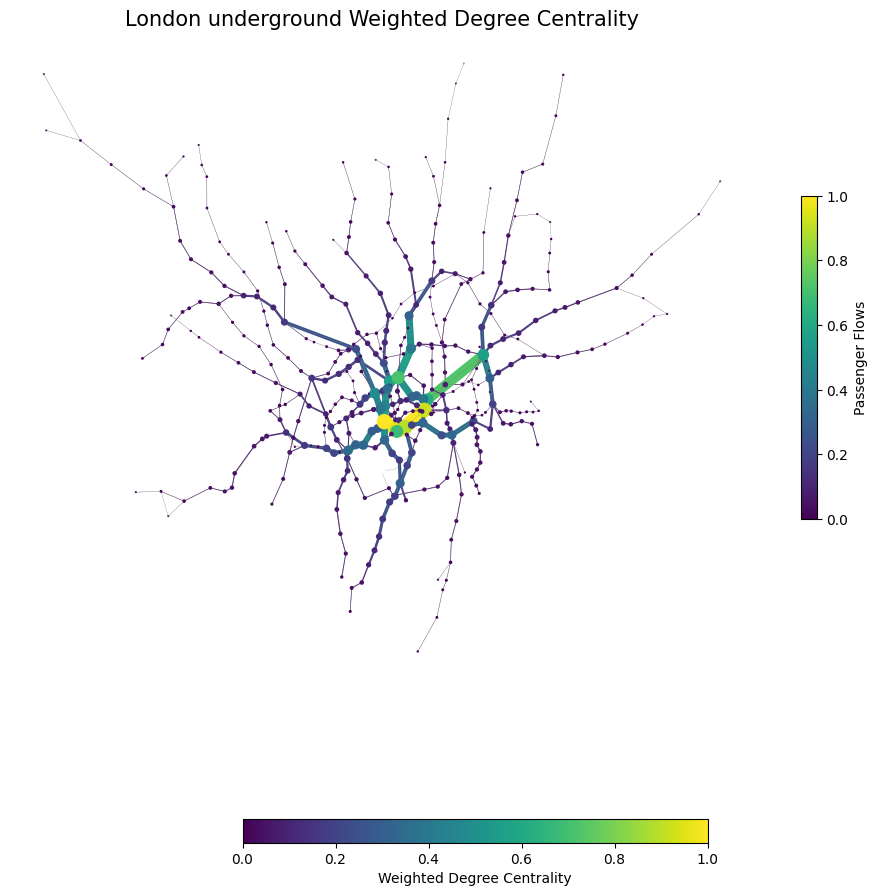

In [99]:
nodes = list(G1.nodes())
degree_values=[dc_g1[node] for node in nodes]

deg_color=[(dc_g1[node]/(max(degree_values))) for node in nodes]
deg_size=[(dc_g1[node]/(max(degree_values)))*100 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(12,12))

edg=nx.draw_networkx_edges(G, pos,edge_color=flow_color, width=flow_width)

nx.draw_networkx_edges(G1, pos, edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G1,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Weighted Degree Centrality",orientation="horizontal", shrink=0.5)
plt.colorbar(edg,label="Passenger Flows", shrink=0.5)
plt.axis("off")
plt.title("London underground Weighted Degree Centrality",fontsize=15)
plt.show()


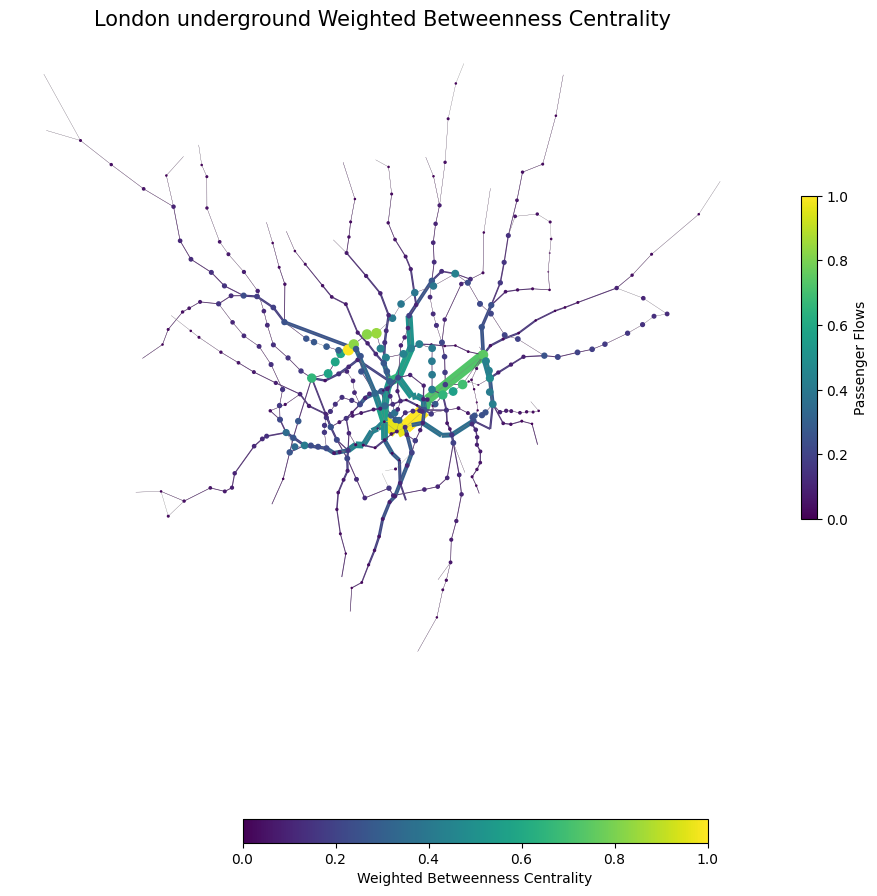

In [100]:
betweeness_values=[bc_g1[node] for node in nodes]

bc_color=[(bc_g1[node]/(max(betweeness_values))) for node in nodes]
bc_size=[(bc_g1[node]/(max(betweeness_values)))*50 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(12,12))

edg=nx.draw_networkx_edges(G, pos,edge_color=flow_color, width=flow_width)
nx.draw_networkx_edges(G1, pos,edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G1,
        pos = pos,
        node_color= bc_color,
        node_size= bc_size)

plt.colorbar(nod,label="Weighted Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.colorbar(edg,label="Passenger Flows", shrink=0.5)
plt.axis("off")
plt.title("London underground Weighted Betweenness Centrality",fontsize=15)
plt.show()

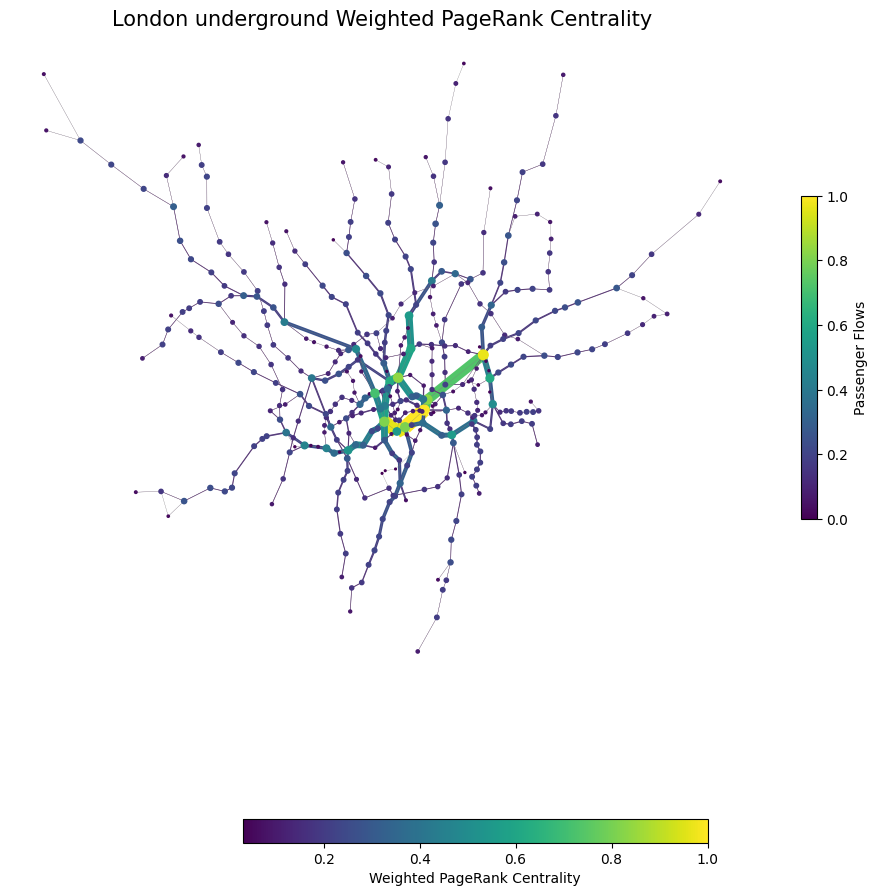

In [103]:
pagerank_values=[pr_g1[node] for node in nodes]

pr_color=[(pr_g1[node]/(max(pagerank_values))) for node in nodes]
pr_size=[(pr_g1[node]/(max(pagerank_values)))*50 for node in nodes]

# Plot graph

fig, ax = plt.subplots(figsize=(12,12))

edg=nx.draw_networkx_edges(G, pos,edge_color=flow_color, width=flow_width)
nx.draw_networkx_edges(G1, pos,edge_color='gray', 
        width=0.2)
nod=nx.draw_networkx_nodes(G1,
        pos = pos,
        node_color= pr_color,
        node_size= pr_size)

plt.colorbar(nod,label="Weighted PageRank Centrality",orientation="horizontal", shrink=0.5)
plt.colorbar(edg,label="Passenger Flows", shrink=0.5)
plt.axis("off")
plt.title("London underground Weighted PageRank Centrality",fontsize=15)
plt.show()

In [104]:
TOK_K = 10

for i in range(TOK_K):
    print("Degree centrality ranking {:3} is the  {:30} node, and the value is {}".format(i+1, dc_sort_g1[i][0], dc_sort_g1[i][1]))

Degree centrality ranking   1 is the  Green Park                     node, and the value is 652550
Degree centrality ranking   2 is the  Bank and Monument              node, and the value is 601435
Degree centrality ranking   3 is the  Waterloo                       node, and the value is 579510
Degree centrality ranking   4 is the  King's Cross St. Pancras       node, and the value is 465741
Degree centrality ranking   5 is the  Westminster                    node, and the value is 445085
Degree centrality ranking   6 is the  Liverpool Street               node, and the value is 405495
Degree centrality ranking   7 is the  Euston                         node, and the value is 367930
Degree centrality ranking   8 is the  Stratford                      node, and the value is 364617
Degree centrality ranking   9 is the  Baker Street                   node, and the value is 316087
Degree centrality ranking  10 is the  Oxford Circus                  node, and the value is 295562


In [105]:
for i in range(TOK_K):
    print("Betweenness centrality ranking {:3} is the {:30} node, and the value is {}".format(i+1, bc_sort_g1[i][0], bc_sort_g1[i][1]))

Betweenness centrality ranking   1 is the West Hampstead                 node, and the value is 0.34901315789473686
Betweenness centrality ranking   2 is the Gospel Oak                     node, and the value is 0.2948966165413534
Betweenness centrality ranking   3 is the Finchley Road & Frognal        node, and the value is 0.28786027568922307
Betweenness centrality ranking   4 is the Hampstead Heath                node, and the value is 0.28730576441102756
Betweenness centrality ranking   5 is the Stratford                      node, and the value is 0.2607957393483709
Betweenness centrality ranking   6 is the Mile End                       node, and the value is 0.24349624060150377
Betweenness centrality ranking   7 is the Willesden Junction             node, and the value is 0.22929197994987469
Betweenness centrality ranking   8 is the Whitechapel                    node, and the value is 0.22778822055137846
Betweenness centrality ranking   9 is the Brondesbury                    n

In [106]:
for i in range(TOK_K):
    print("PageRank centrality ranking {:3} is the {:30} node, and the value is {}".format(i+1, pr_sort_g1[i][0], pr_sort_g1[i][1]))

PageRank centrality ranking   1 is the Bank and Monument              node, and the value is 0.012168257636856866
PageRank centrality ranking   2 is the Stratford                      node, and the value is 0.01176422183061367
PageRank centrality ranking   3 is the King's Cross St. Pancras       node, and the value is 0.0102242941438817
PageRank centrality ranking   4 is the Liverpool Street               node, and the value is 0.010133329056676407
PageRank centrality ranking   5 is the Green Park                     node, and the value is 0.009894642058286076
PageRank centrality ranking   6 is the Waterloo                       node, and the value is 0.009821838030530147
PageRank centrality ranking   7 is the Baker Street                   node, and the value is 0.008675781302058384
PageRank centrality ranking   8 is the Euston                         node, and the value is 0.007630231750684867
PageRank centrality ranking   9 is the West Ham                       node, and the value i

In [107]:
for i in range(TOK_K):
    print("Closeness centrality ranking {:3} is the {:30} node, and the value is {}".format(i+1, cc_sort_g1[i][0], cc_sort_g1[i][1]))

Closeness centrality ranking   1 is the West Hampstead                 node, and the value is 5.751599048783295e-06
Closeness centrality ranking   2 is the Finchley Road & Frognal        node, and the value is 5.7139118611953675e-06
Closeness centrality ranking   3 is the Hampstead Heath                node, and the value is 5.682075489441198e-06
Closeness centrality ranking   4 is the Gospel Oak                     node, and the value is 5.66274606914465e-06
Closeness centrality ranking   5 is the Brondesbury                    node, and the value is 5.6449999525820006e-06
Closeness centrality ranking   6 is the Upper Holloway                 node, and the value is 5.623380475209672e-06
Closeness centrality ranking   7 is the Crouch Hill                    node, and the value is 5.593508833681671e-06
Closeness centrality ranking   8 is the Kentish Town West              node, and the value is 5.5884583804452015e-06
Closeness centrality ranking   9 is the Harringay Green Lanes         

In [120]:
# 2.2 
# network efficiency
# average shorst path lenght
def cal_network_efficiency_apl(G,N):

    apl = 0
    e = 0
    nodes = list(G.nodes())

    if len(nodes) < 2:
        return 0,0

    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if i != j:
                try:
                    path = nx.shortest_path(G, nodes[i], nodes[j])
                    t = 0
                    for k in range(len(path)-1):
                        weight = G.get_edge_data(path[k], path[k+1])['flows']
                        t += weight
                    e += 1/t
                    apl += t
                except:
                    d = 0
                    e += 0

    E = e / (N*(N-1))
    APL = apl / (N*(N-1))

    return E, APL


In [121]:
# 2.3 

def att_node_second(G1,nodes_sort):
    '''
    node removal non-sequential
    '''

    G = G1.copy()

    res_eff = []
    res_apl = []

    N = len(G.nodes())
    e0, apl = cal_network_efficiency_apl(G,N)
    res_eff.append(e0)

    res_apl.append(apl)

    for node in nodes_sort:

        G = G1.copy()

        G.remove_node(node)

        e, apl = cal_network_efficiency_apl(G,N)
        res_eff.append(e)
        res_apl.append(apl)

    return res_eff,res_apl



In [122]:
bc_sort_node_g2 = [k for k,v in bc_sort_g2]

bc_eff_2, bc_apl_2 = att_node_second(G1, bc_sort_node_g2[:3])

In [123]:
dc_sort_node_g1 = [k for k,v in dc_sort_g1]
bc_sort_node_g1 = [k for k,v in bc_sort_g1]
pr_sort_node_g1 = [k for k,v in pr_sort_g1]

In [124]:
dc_eff_g1, dc_apl_g1 = att_node_second(G1, dc_sort_node_g1[:3])
bc_eff_g1, bc_apl_g1 = att_node_second(G1, bc_sort_node_g1[:3])
pr_eff_g1, pr_apl_g1 = att_node_second(G1, pr_sort_node_g1[:3])

In [125]:
print(bc_eff_2)
print(bc_sort_node_g2[:3])
print(bc_apl_2)

[4.713923120154063e-06, 4.7049823655412246e-06, 4.76605778785002e-06, 4.9718428736897825e-06]
['Stratford', 'Bank and Monument', 'Liverpool Street']
[651348.8363653367, 492577.7157044888, 586240.7267082294, 552436.382936409]


In [126]:
print(dc_eff_g1)
print(dc_sort_node_g1[:3])
print(dc_apl_g1)

[4.713923120154063e-06, 4.8325157647573075e-06, 4.76605778785002e-06, 4.832950471955637e-06]
['Green Park', 'Bank and Monument', 'Waterloo']
[651348.8363653367, 564127.4020511222, 586240.7267082294, 554982.2664401496]


In [127]:
print(bc_eff_g1)
print(bc_sort_node_g1[:3])
print(bc_apl_g1)

[4.713923120154063e-06, 4.539401740392705e-06, 4.544925167842335e-06, 4.579984915505672e-06]
['West Hampstead', 'Gospel Oak', 'Finchley Road & Frognal']
[651348.8363653367, 659405.9355548628, 658902.8201932668, 657226.1056359102]


In [128]:
print(pr_eff_g1)
print(pr_sort_node_g1[:3])
print(pr_apl_g1)

[4.713923120154063e-06, 4.76605778785002e-06, 4.7049823655412246e-06, 4.820117019719281e-06]
['Bank and Monument', 'Stratford', "King's Cross St. Pancras"]
[651348.8363653367, 586240.7267082294, 492577.7157044888, 677427.8119389027]
